In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## SPD - with interference- 60 Nodes - 200mx200m - 40m range

In [37]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_17\\data_spd_2_n_60_p_600_pdf_csma.csv')

In [38]:
df.head()

,run,PauseTime,repetition,Module,echoedPk:count,echoedPk:sum(packetBytes),packetReceived:count,packetReceived:sum(packetBytes),packets received,packets sent,packetSent:count,packetSent:sum(packetBytes)
0,RandomWaypointMobility-SPD-B-31-20220228-13:58...,600,1,TARPNetwork.node[17].app[0],NaN,NaN,585.0,585000.0,585.0,900.0,900.0,900000.0
1,RandomWaypointMobility-SPD-B-31-20220228-13:58...,600,1,TARPNetwork.node[22].app[0],708.0,708000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,RandomWaypointMobility-SPD-B-56-20220228-14:08...,600,26,TARPNetwork.node[17].app[0],NaN,NaN,483.0,483000.0,483.0,900.0,900.0,900000.0
3,RandomWaypointMobility-SPD-B-38-20220228-14:01...,600,8,TARPNetwork.node[22].app[0],795.0,795000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,RandomWaypointMobility-SPD-B-38-20220228-14:01...,600,8,TARPNetwork.node[17].app[0],NaN,NaN,458.0,458000.0,458.0,900.0,900.0,900000.0


In [39]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [40]:
df = df.sort_values(by=['repetition'])

In [41]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [42]:
results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1


In [43]:
print (results)   

[0.6795, 0.8041, 0.9059, 0.74, 0.7398, 0.6818, 0.6894, 0.8715, 0.7392, 0.7441, 0.7881, 0.8228, 0.7256, 0.8621, 0.875, 0.8381, 0.7953, 0.8636, 0.7769, 0.571, 0.7117, 0.851, 0.8862, 0.8574, 0.74, 0.8785, 0.7587, 0.8608, 0.8591, 0.7423]


In [44]:
print (results_x) 

[0.8822, 0.7867, 0.9122, 0.8122, 0.7767, 0.9033, 0.7567, 0.8678, 0.8833, 0.85, 0.8933, 0.9944, 0.9111, 0.8533, 0.9467, 0.8467, 0.9867, 0.9556, 0.9522, 0.5022, 0.9889, 0.9233, 0.9422, 0.8311, 0.9489, 0.9578, 0.92, 0.9078, 0.94, 0.7333]


In [45]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 78.86


In [46]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 87.89


In [47]:
df_dd_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[96.26, 95.25, 94.62, 94.82, 93.74, 92.46, 94.82, 97.98]})

dd_x_errors = [0.667, 1.14, 1.21, 1.21, 1.53, 3.4, 2.67, 0.959]


df_spd_1_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[72.61, 68.85, 66.5, 66.19, 63.68, 69.43, 80.55, 90.8]})

spd_1_x_errors = [2.86, 3.53, 2.37, 3.58, 3.96, 4.46, 2.73, 2.66]


df_spd_2_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[82.1, 77.67, 76.65, 77.64, 76.06, 79.23, 87.89, 93.96]})

spd_2_x_errors = [2.06, 2.23, 1.61, 3.33, 4.17, 4.49, 3.49, 2.33]

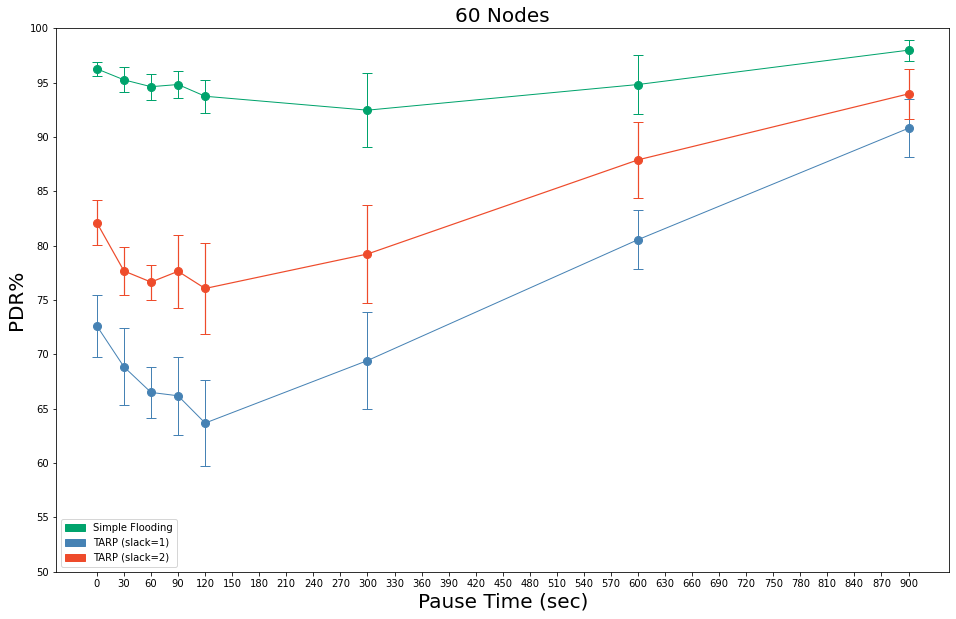

In [62]:
plt.xlabel("Pause Time (sec)", fontsize=20)
plt.ylabel("PDR%", fontsize=20)
plt.title("60 Nodes", fontsize=20)

plt.xticks(np.arange(0,901, 30), fontsize=10)
plt.yticks(np.arange(0,101, 5), fontsize=10)
# plt.grid()

# plt.plot(df_dd_x.PauseTime, df_dd_x.PDF,  'g-x') 

# plt.plot(df_spd_1_x.PauseTime, df_spd_1_x.PDF,  'b-x') 

# plt.plot(df_spd_2_x.PauseTime, df_spd_2_x.PDF,  'r-x') 

plt.ylim([50, 100])

plt.errorbar(
  x=df_dd_x.PauseTime, 
  y=df_dd_x.PDF, 
  yerr=dd_x_errors, 
  capsize=5,
  marker='o', 
  color='#00A36C', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_1_x.PauseTime, 
  y=df_spd_1_x.PDF, 
  yerr=spd_1_x_errors, 
  capsize=5,
  marker='o', 
  color='#4682B4', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x.PauseTime, 
  y=df_spd_2_x.PDF, 
  yerr=spd_2_x_errors, 
  capsize=5,
  marker='o', 
  color='#EE4B2B', 
  markersize=8, 
  linewidth=1.2, 
  linestyle='-')


red_patch = mpatches.Patch(color='#EE4B2B', label='TARP (slack=2)')
green_patch = mpatches.Patch(color='#00A36C', label='Simple Flooding')
blue_patch = mpatches.Patch(color='#4682B4', label='TARP (slack=1)')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.savefig('final-simulation-pdf-60-new-realistic.png', dpi=300)

## Average no. of packets

In [49]:
df_sp = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_18\\data_dd_n_60_p_900_dpf.csv')
df_tarp_1 = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_18\\data_spd_1_n_60_p_900_dpf.csv')
df_tarp_2 = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_18\\data_spd_2_n_60_p_900_dpf.csv')

In [50]:
df_sp.Module = df_sp.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]
df_tarp_1.Module = df_tarp_1.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]
df_tarp_2.Module = df_tarp_2.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [51]:
# Calculate the average
sp_mean = np.mean(df_sp.nbDataPacketsForwarded)
tarp_1_mean = np.mean(df_tarp_1.nbDataPacketsForwarded)
tarp_2_mean = np.mean(df_tarp_2.nbDataPacketsForwarded)

# Calculate the standard deviation
sp_std = np.std(df_sp.nbDataPacketsForwarded)
tarp_1_std = np.std(df_tarp_1.nbDataPacketsForwarded)
tarp_2_std = np.std(df_tarp_2.nbDataPacketsForwarded)


In [52]:
# Create lists for the plot
protocols = [ "Simple Flooding", 'TARP (slack=2)', 'TARP (slack=1)']
x_pos = np.arange(len(protocols))
CTEs = [sp_mean, tarp_2_mean, tarp_1_mean]
error = [sp_std, tarp_2_std, tarp_1_std]

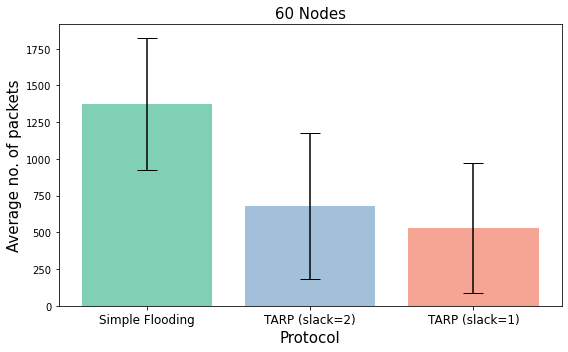

In [59]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=['#00A36C', '#4682B4', '#EE4B2B'])
ax.set_ylabel('Average no. of packets', fontsize=15)
ax.set_xticks(x_pos)
plt.xlabel("Protocol", fontsize=15)
ax.set_xticklabels(protocols, fontsize=12)
ax.set_title('60 Nodes', fontsize=15)
ax.yaxis.grid(False)

fig.set_size_inches(8, 5)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars_60_real.png', dpi=300)
plt.show()

## Mean no. of hops

In [167]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_17\\data_spd_2_n_60_p_900_pdf_csma_hops.csv')

In [168]:
df.head()

,run,PauseTime,repetition,Module,meanNbHops
0,RandomWaypointMobility-SPD-B-60-20220228-13:57...,900,0,TARPNetwork.node[56].generic.np,0.0
1,RandomWaypointMobility-SPD-B-60-20220228-13:57...,900,0,TARPNetwork.node[42].generic.np,0.0
2,RandomWaypointMobility-SPD-B-60-20220228-13:57...,900,0,TARPNetwork.node[43].generic.np,0.0
3,RandomWaypointMobility-SPD-B-60-20220228-13:57...,900,0,TARPNetwork.node[44].generic.np,0.0
4,RandomWaypointMobility-SPD-B-60-20220228-13:57...,900,0,TARPNetwork.node[45].generic.np,0.0


In [169]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [170]:
df = df.sort_values(by=['repetition'])

In [171]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [172]:
sorted(df_22.meanNbHops.round(decimals = 4).tolist())

[1.1969,
 1.2892,
 1.5811,
 2.0358,
 2.3749,
 2.6225,
 3.0022,
 3.3794,
 3.9044,
 3.9603,
 4.0408,
 4.0574,
 4.0859,
 4.1853,
 4.2047,
 4.4065,
 4.4673,
 4.5167,
 4.8992,
 5.0779,
 5.4017,
 5.9852,
 5.9915,
 6.9529,
 7.0624,
 7.1828,
 7.3387,
 7.5492,
 7.9481,
 8.9559]

In [173]:
df_22.meanNbHops.round(decimals = 4).mean()

4.655226666666667

In [174]:
df_dd_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'meanNbHops':[3.4122, 3.8854, 3.964, 3.9806, 4.0614, 4.2483, 4.5538, 4.7231]})

dd_x_errors = [0.142, 0.187, 0.193, 0.249, 0.28, 0.409, 0.564, 0.726]


df_spd_1_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'meanNbHops':[2.7701, 2.8448, 3.2403, 3.1551, 3.1896, 3.9267, 3.9919, 4.5846]})

spd_1_x_errors = [0.16, 0.146, 0.244, 0.227, 0.278, 0.425, 0.535, 0.714]


df_spd_2_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'meanNbHops':[2.9632, 3.1576, 3.3583, 3.2433, 3.6197, 4.2328, 4.2927, 4.6552]})

spd_2_x_errors = [0.149, 0.148, 0.227, 0.198, 0.237, 0.407, 0.555, 0.724]

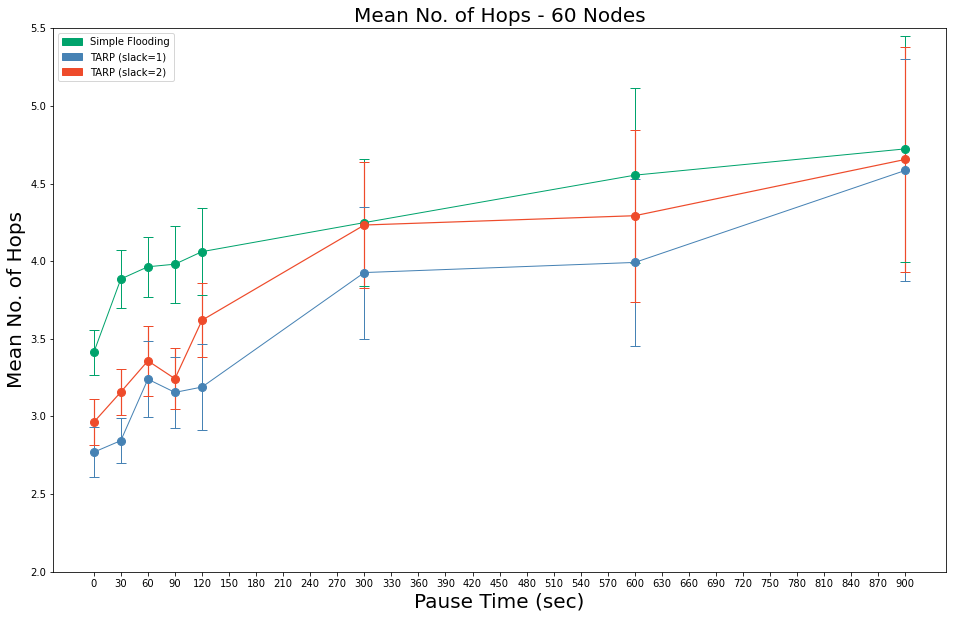

In [175]:
plt.xlabel("Pause Time (sec)", fontsize=20)
plt.ylabel("Mean No. of Hops", fontsize=20)
plt.title("60 Nodes", fontsize=20)

plt.xticks(np.arange(0,901, 30))
plt.yticks(np.arange(0,7, 0.5))
# plt.grid()


plt.ylim([2, 5.5])

plt.errorbar(
  x=df_dd_x.PauseTime, 
  y=df_dd_x.meanNbHops, 
  yerr=dd_x_errors, 
  capsize=5,
  marker='o', 
  color='#00A36C', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_1_x.PauseTime, 
  y=df_spd_1_x.meanNbHops, 
  yerr=spd_1_x_errors, 
  capsize=5,
  marker='o', 
  color='#4682B4', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x.PauseTime, 
  y=df_spd_2_x.meanNbHops, 
  yerr=spd_2_x_errors, 
  capsize=5,
  marker='o', 
  color='#EE4B2B', 
  markersize=8, 
  linewidth=1.2, 
  linestyle='-')

red_patch = mpatches.Patch(color='#EE4B2B', label='TARP (slack=2)')
green_patch = mpatches.Patch(color='#00A36C', label='Simple Flooding')
blue_patch = mpatches.Patch(color='#4682B4', label='TARP (slack=1)')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.savefig('final-simulation-pdf-60-new-realistic-hops.png', dpi=300)